In [1]:
import numpy as np

In [8]:
x=np.arange(0,501,1);
y=np.arange(0,501,1);
z=np.arange(0,301,1);

x_step10=np.arange(0,501,10);
y_step10=np.arange(0,501,10);
print(x_step10)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500]


In [9]:
LEDarrayA_x=np.arange(100,160,1);
LEDarrayA_y=np.arange(100,160,1);
LEDarrayA_z=np.repeat(250,3600);

LEDarrayB_x=np.arange(350,410,1);
LEDarrayB_y=np.arange(100,160,1);
LEDarrayB_z=np.repeat(250,3600);

LEDarrayC_x=np.arange(100,160,1);
LEDarrayC_y=np.arange(350,410,1);
LEDarrayC_z=np.repeat(250,3600);

LEDarrayD_x=np.arange(350,410,1);
LEDarrayD_y=np.arange(350,410,1);
LEDarrayD_z=np.repeat(250,3600);

TableSurface_x=np.arange(0,501,1);
TableSurface_y=np.arange(0,501,1);
TableSurface_z=np.arange(85,501*501,1);

In [10]:
m=-(np.log(2))/(np.log(np.cos(np.pi*40/180)));
print(m)

2.6007802315158695


In [11]:
I_0 = 0.73;
distance_height = 250-85;
def horizontal_illuminance(src_x,src_y,des_x,des_y):
    tan_of_angle_irradiance=(np.sqrt(np.power(src_x-des_x,2) + np.power(src_y-des_y,2)))/(distance_height);
    angle_irradiance=np.arctan(tan_of_angle_irradiance);
    distanceSquare_src_des = (np.power((src_x-des_x)/100,2) + np.power((src_y-des_y)/100,2)) + np.power((distance_height/100),2); #convert to m from cm;
    E_hor=((I_0*np.power(np.cos(angle_irradiance),m))/(distanceSquare_src_des))*np.cos(angle_irradiance); #angle_incidence = angle_irradiance;
    #print(E_hor);
    return E_hor

In [12]:
def horizontal_illuminance_allLED(des_x,des_y):
    E_hor = 0;
    for src_x in LEDarrayA_x:
        for src_y in LEDarrayA_y:
            E_hor=E_hor + horizontal_illuminance(src_x,src_y,des_x,des_y);

    for src_x in LEDarrayB_x:
        for src_y in LEDarrayB_y:
            E_hor=E_hor + horizontal_illuminance(src_x,src_y,des_x,des_y);

    for src_x in LEDarrayC_x:
        for src_y in LEDarrayC_y:
            E_hor=E_hor + horizontal_illuminance(src_x,src_y,des_x,des_y);

    for src_x in LEDarrayD_x:
        for src_y in LEDarrayD_y:
            E_hor=E_hor + horizontal_illuminance(src_x,src_y,des_x,des_y);

    return E_hor

In [13]:
E_hor_0_0=horizontal_illuminance_allLED(0,0);
E_hor_140_380=horizontal_illuminance_allLED(140,380);
print("illuminance at (0,0): %.4f" % E_hor_0_0);
print("illuminance at (140,380): %.4f" % E_hor_140_380);

illuminance at (0,0): 114.8569
illuminance at (140,380): 985.0086


In [14]:
#########################################
## This is ploting with step 1, very slow!
#########################################
#E_hor_allsurface=np.zeros((501,501));
#for des_x in x:
#    if des_x%50==0:
#        print(des_x);
#    for des_y in y[100:101]:
#        E_hor_allsurface[des_x,des_y] = horizontal_illuminance_allLED(des_x,des_y);

#########################################
## This is ploting with step 10, for fast calculation and plot
#########################################
E_hor_allsurface=np.zeros((51,51));
for des_x in x_step10:
    if des_x%50==0:
        print(des_x); #showing calculation progress, from 0 to 500 with step 50.
    for des_y in y_step10:
        E_hor_allsurface[int(des_x/10),int(des_y/10)] = horizontal_illuminance_allLED(des_x,des_y);

0
50
100
150
200
250
300
350
400
450
500


In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

[[114.85688794 128.58498127 143.31056391 ... 157.29526123 141.79681393
  127.16541135]
 [128.58498127 144.61942926 161.92070434 ... 178.44078712 160.13758944
  142.95698131]
 [143.31056391 161.92070434 182.11988035 ... 201.51225465 180.03271964
  159.98612276]
 ...
 [157.29526123 178.44078712 201.51225465 ... 223.76991231 199.12282416
  176.2375138 ]
 [141.79681393 160.13758944 180.03271964 ... 199.12282416 177.97750446
  158.23150831]
 [127.16541135 142.95698131 159.98612276 ... 176.2375138  158.23150831
  141.32014766]]


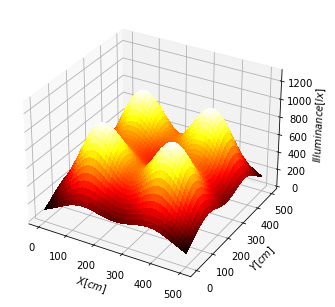

In [16]:
#########################################
## This is ploting with step 1, very slow!
#########################################
#xs, ys = np.meshgrid(x, y);

#fig = plt.figure();
#ax = Axes3D(fig);
#ax.plot_surface(xs, ys, E_hor_allsurface, rstride=1, cstride=1, cmap='hot');
##ax.plot_surface(xs, ys, E_hor_allsurface)
#plt.show();

#########################################
## This is ploting with step 10, for fast calculation and plot
#########################################
xs, ys = np.meshgrid(x_step10, y_step10);
print(E_hor_allsurface);

fig = plt.figure();
ax = Axes3D(fig);
surf=ax.plot_surface(xs, ys, E_hor_allsurface, rstride=1, cstride=1, cmap='hot', shade=True, linewidth=10, antialiased=False);
ax.set_xlabel('$X [cm]$');
ax.set_ylabel('$Y [cm]$');
ax.set_zlabel('$Illuminance [lx]$', rotation = 180);

ax.set_zlim(0, 1300);
plt.show();